In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Path ke folder utama di Google Drive
drive_path = '/content/drive/My Drive/'

# Nama folder utama
main_folder = 'DatasetPenyakit'

# Path ke folder train, val, dan test
train_folder = os.path.join(drive_path, main_folder, 'train')
val_folder = os.path.join(drive_path, main_folder, 'val')
test_folder = os.path.join(drive_path, main_folder, 'test')

# List file dan folder dalam setiap direktori
train_files = os.listdir(train_folder)
val_files = os.listdir(val_folder)
test_files = os.listdir(test_folder)

# Tampilkan isi folder
print(f"Isi folder 'train': {train_files}")
print(f"Isi folder 'val': {val_files}")
print(f"Isi folder 'test': {test_files}")

Isi folder 'train': ['Bacterial Leaf Spot', 'Healthy Leaf', 'Downy Mildew', 'Mosaic Disease', 'Powdery_Mildew', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Wilt Disease', 'White Mold Disease', 'Mosaic Virus Disease', 'Healthy Leaf Terong', 'Insect Pest Disease', 'Leaf Spot Disease', 'Leafcurl', 'Daunsehat', 'yelowwiss', 'Pest', 'Phytopthora', 'Virus', 'Nematode', 'Bacteria', 'Healthy', 'Fungi']
Isi folder 'val': ['Bacterial Leaf Spot', 'Healthy Leaf', 'Downy Mildew', 'Mosaic Disease', 'Powdery_Mildew', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___he

In [ ]:
# Pengaturan generator data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
train_dir = train_folder
validation_dir = val_folder
test_dir = test_folder

# Create ImageDataGenerator for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Create ImageDataGenerator for validation and testing (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 7448 images belonging to 31 classes.
Found 931 images belonging to 31 classes.
Found 931 images belonging to 31 classes.


###insight:
Dalam proses pelatihan model klasifikasi citra, digunakan teknik augmentasi data untuk meningkatkan generalisasi dan mencegah overfitting. Augmentasi dilakukan dengan ImageDataGenerator dari TensorFlow, menggunakan transformasi seperti rotasi, pergeseran, zoom, shearing, dan pembalikan horizontal, serta normalisasi piksel dengan rescale=1./255. Transformasi ini hanya diterapkan pada data pelatihan, sedangkan data validasi dan pengujian hanya dinormalisasi tanpa augmentasi agar evaluasi tetap objektif. Pendekatan ini membantu model belajar dari variasi data yang lebih luas tanpa mengubah label asli, sehingga meningkatkan akurasi terhadap data baru.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet

# Calculate the number of classes
num_classes = len(os.listdir(train_folder))

# Build the MobileNetV1 model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Pelatihan model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    callbacks=[earlystop_callback]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 2274s 10s/step - accuracy: 0.5947 - loss: 1.3711 - val_accuracy: 0.6552 - val_loss: 1.1949
Epoch 2/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 209s 895ms/step - accuracy: 0.8138 - loss: 0.5454 - val_accuracy: 0.7873 - val_loss: 0.7076
Epoch 3/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 229s 981ms/step - accuracy: 0.8561 - loss: 0.4337 - val_accuracy: 0.7852 - val_loss: 0.7107
Epoch 4/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 251s 932ms/step - accuracy: 0.8893 - loss: 0.3282 - val_accuracy: 0.8174 - val_loss: 0.6368
Epoch 5/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 206s 885ms/step - accuracy: 0.8939 - loss: 0.3029 - val_accuracy: 0.7497 - val_loss: 0.8022
Epoch 6/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 207s 887ms/step - accuracy: 0.8952 - loss: 0.3109 - val_accuracy: 0.7701 - val_loss: 0.9628
Epoch 7/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 209s 898ms/step - accuracy: 0.9276 - loss: 0.2104 - val_accuracy: 0.8571 - val_loss: 0.5137
Epoch 8/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 207s 889ms/step - accuracy: 0

###Insight:
Model klasifikasi citra dilatih menggunakan arsitektur MobileNet selama maksimal 200 epoch, namun pelatihan dihentikan lebih awal pada epoch ke-12 melalui mekanisme early stopping. Akurasi pelatihan meningkat secara signifikan dari 59,47% pada epoch pertama hingga 93,59% pada epoch ke-10, menunjukkan proses belajar yang efektif. Akurasi validasi tertinggi tercapai pada epoch ke-7 sebesar 85,71%, sebelum mengalami penurunan di epoch selanjutnya. Hal ini mengindikasikan awal mula overfitting, sehingga penghentian pelatihan secara dini membantu menjaga kemampuan generalisasi model. Secara keseluruhan, MobileNet menunjukkan performa yang baik dan stabil pada dataset yang digunakan.

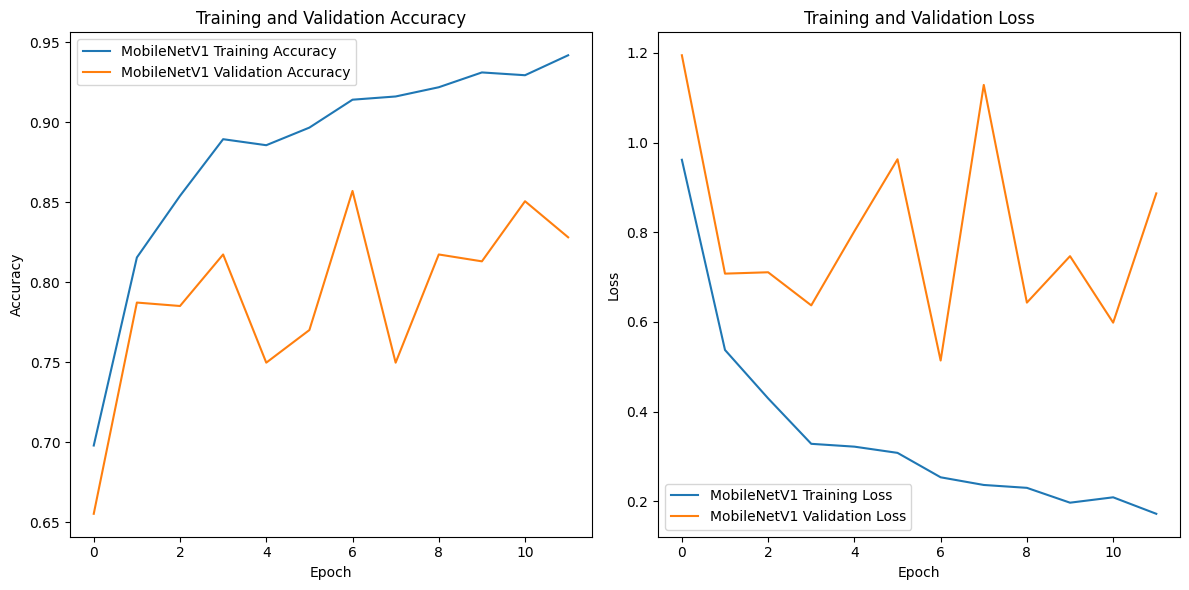

In [ ]:
# Extract training history for MobileNetV1
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='MobileNetV1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='MobileNetV1 Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='MobileNetV1 Training Loss')
plt.plot(history.history['val_loss'], label='MobileNetV1 Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Insight:
Visualisasi hasil pelatihan dan validasi model MobileNet menunjukkan pola yang umum dalam proses pembelajaran model deep learning. Grafik akurasi (kiri) memperlihatkan bahwa akurasi pelatihan meningkat secara konsisten hingga mencapai lebih dari 94% pada epoch ke-11. Sementara itu, akurasi validasi mengalami fluktuasi, dengan puncak pada sekitar epoch ke-6 hingga ke-7, mengindikasikan bahwa performa model terhadap data yang tidak terlihat mulai mengalami ketidakstabilan setelah titik tersebut.

Grafik loss (kanan) mendukung temuan ini, di mana loss pelatihan terus menurun secara stabil, sementara loss validasi menunjukkan pola naik-turun yang cukup tajam setelah beberapa epoch. Ketidaksesuaian antara tren pelatihan dan validasi ini menunjukkan adanya indikasi awal overfitting, di mana model belajar terlalu spesifik terhadap data pelatihan dan kehilangan kemampuan generalisasi.

Maka dari itu, penggunaan strategi early stopping pada epoch ke-12 adalah langkah yang tepat untuk menghentikan pelatihan sebelum overfitting menjadi lebih parah. Dapat disimpulkan bahwa MobileNet mampu belajar dengan baik pada data pelatihan, namun perlu perhatian lebih dalam menjaga kestabilan performa terhadap data validasi, seperti melalui penyesuaian parameter pelatihan, dropout, atau penambahan data.

30/30 ━━━━━━━━━━━━━━━━━━━━ 244s 8s/step
Confusion Matrix
[[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  8  0  0  0  0  5  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 1  0  0  0 18  0  0  0  0  0  0  3  0  1  6  0  0  0  0  1  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  1  0  0 28  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  3  0  2  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  4 24  0  0  0  0  0  0  0  0  0  0

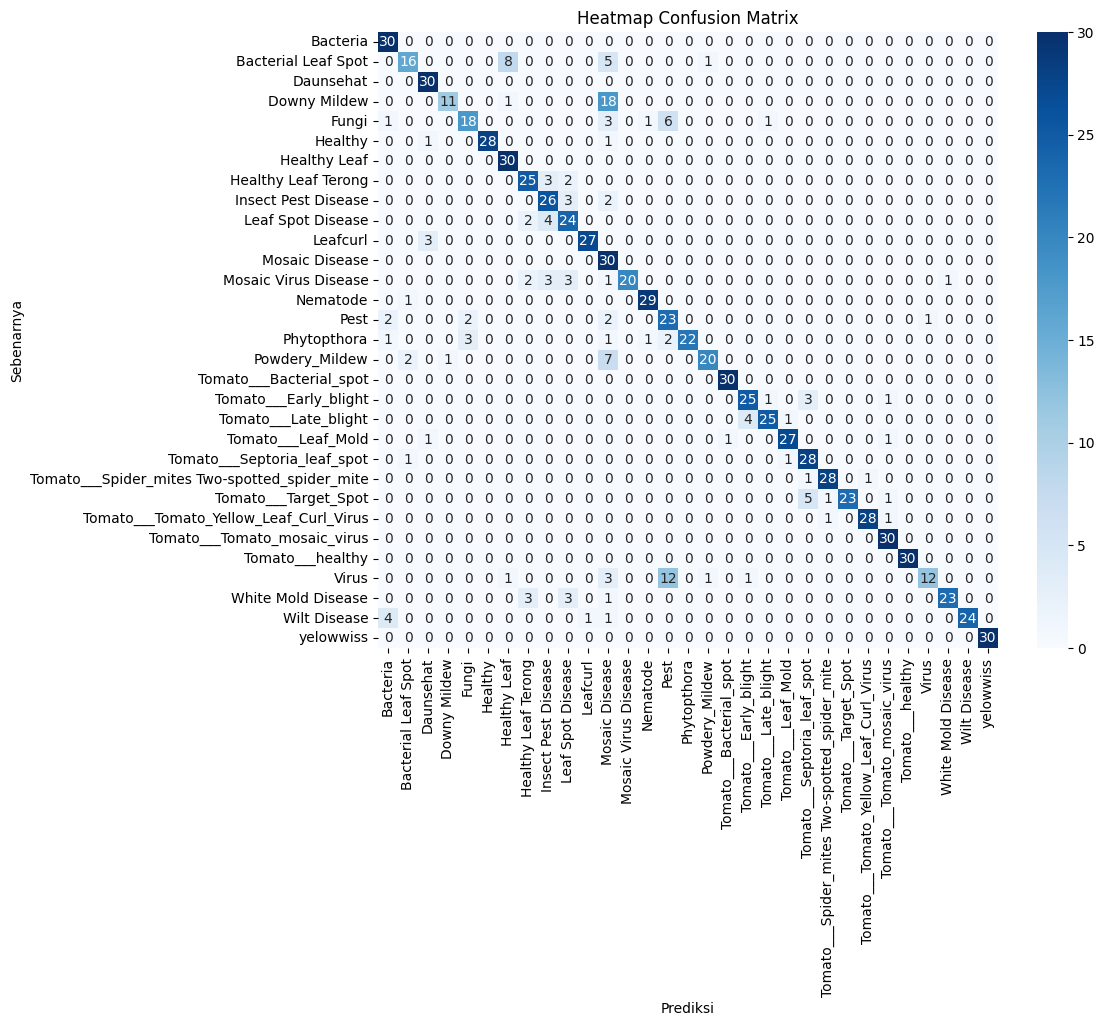

In [ ]:
# Evaluasi model
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get the class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Get the unique class indices present in the true_classes
unique_true_classes = np.unique(true_classes)

# Filter the class_labels to match the unique true classes
# We assume that the index in class_labels corresponds to the class index
filtered_class_labels = [class_labels[i] for i in unique_true_classes]


# Menghitung confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

# Menghitung metrik evaluasi
accuracy = accuracy_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes, average='macro')
precision = precision_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Akurasi: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Skor F1: {f1:.4f}')

# Laporan klasifikasi untuk setiap kelas
print('\nLaporan Klasifikasi:\n')
# Use the filtered_class_labels for target_names
print(classification_report(true_classes, predicted_classes, target_names=filtered_class_labels))

# Mencetak nama setiap kelas
print("\nLabel Kelas yang Dievaluasi:")
# Use the filtered_class_labels
print(filtered_class_labels)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 8))
# Use filtered_class_labels for xticklabels and yticklabels in the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=filtered_class_labels, yticklabels=filtered_class_labels)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [ ]:
# Simpan model
model_save_path = '/content/drive/My Drive/final/final.h5'
model.save(model_save_path)
print(f" Model disimpan ke: {model_save_path}")

 Model disimpan ke: /content/drive/My Drive/final/final.h5


### Insight:
Confusion matrix menunjukkan bahwa model MobileNetV1 memiliki performa klasifikasi yang sangat baik secara umum. Sebagian besar kelas memiliki prediksi tepat dengan jumlah benar mendekati maksimum (30 data per kelas), seperti pada kelas Bacteria, Daunsehat, Mosaic Disease, dan Tomato__Target_Spot. Namun, terdapat beberapa kesalahan klasifikasi minor pada kelas yang serupa secara visual, seperti Powdery_Mildew dan Downy_Mildew, serta Tomato__Tomato_mosaic_virus yang keliru diprediksi sebagai kelas Virus. Hal ini mengindikasikan bahwa meskipun akurasi tinggi, model masih kesulitan membedakan penyakit yang memiliki gejala visual yang mirip. Secara keseluruhan, model menunjukkan generalisasi yang kuat dan siap digunakan untuk klasifikasi citra penyakit tanaman dengan tingkat keandalan tinggi.

In [ ]:
import pickle

# Ambil label map dari generator
label_map = train_generator.class_indices  # dict: {'nama_kelas': angka}

# Simpan ke file .pkl
with open('/content/drive/My Drive/final/label_map.pkl', 'wb') as f:
    pickle.dump(label_map, f)

print("✅ label_map berhasil disimpan.")

✅ label_map berhasil disimpan.
